### K-Means Algorithm

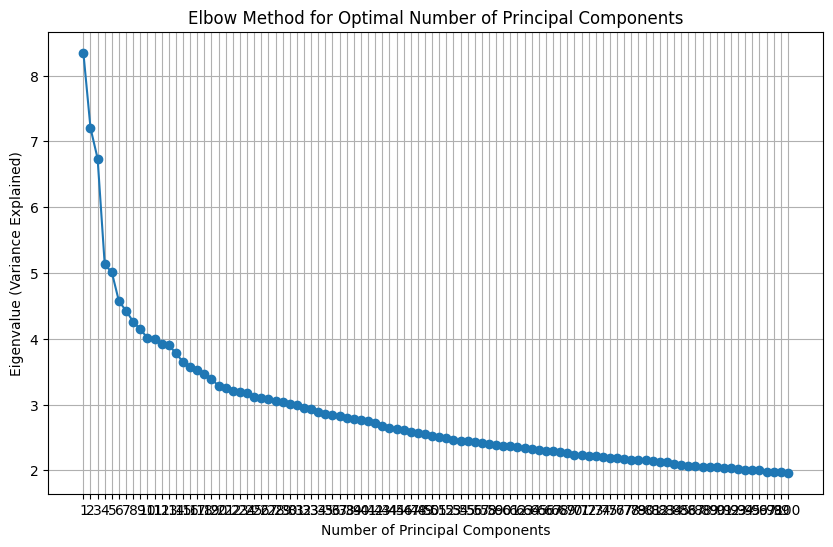

In [5]:


# # Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)

# # feature reduction using PCA
# # Initialize PCA
# pca = PCA(n_components=100)

# # Fit PCA on scaled features
# pca.fit(scaled_features)

# # Get explained variance (eigenvalues)
# explained_variance = pca.explained_variance_

# # Plotting the explained variance
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
# plt.title('Elbow Method for Optimal Number of Principal Components')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Eigenvalue (Variance Explained)')
# plt.xticks(range(1, len(explained_variance) + 1))
# plt.grid()
# plt.show()

Penurunan variance yang dijelaskan (eigen value) mulai pada principal component sekitar ke-10 mulai melandai. Kita bisa menggunakan nilai tersebut untuk mereduksi jumlah fitur kita menjadi hanya 10 principal component

In [6]:
# apply PCA with best Principal component
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_features)

In [7]:
# implementasi K-Means
# misalkan kita menggunakan jumlah kluster optimal sebesar 5. Nilai tersebut bisa dicari dengan pendekatan lainnya
# namun untuk alasan mempersingkat waktu, nilai k=5 dianggap optimal
optimal_k = 5  
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(pca_result)

# Get cluster labels and centroids
labels = kmeans_final.labels_
centroids = kmeans_final.cluster_centers_

# Add cluster labels to your DataFrame
content_based_dataframe['Cluster'] = kmeans_final.labels_

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

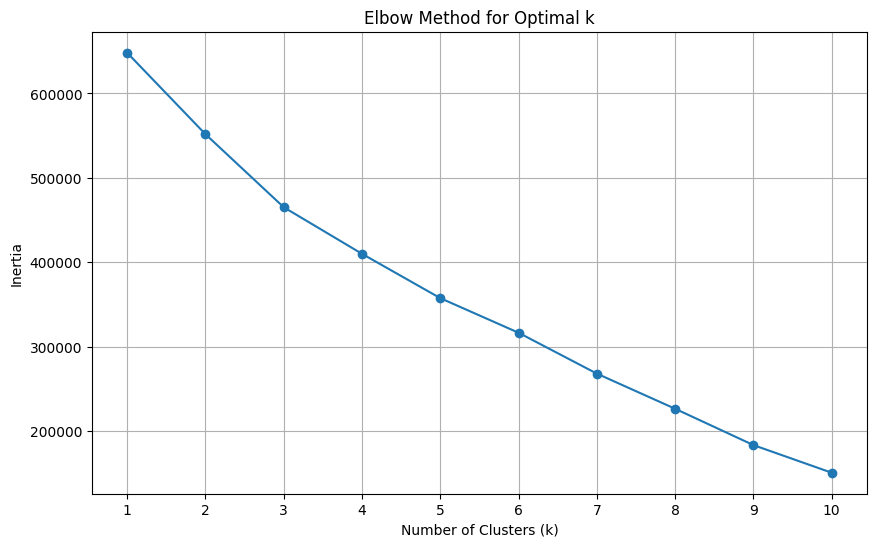

In [8]:
# List to hold the sum of squared distances (inertia)
inertia = []

# Range of clusters to test
k_values = range(1, 11)  # You can adjust this range based on your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)  # Append inertia for each k

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [13]:
distances = np.linalg.norm(pca_result[:, np.newaxis] - centroids, axis=2)

In [14]:
# Get top 5 nearest points for each centroid
nearest_indices = np.argsort(distances, axis=0)[:5]

# Retrieve the nearest data points for each centroid
top_nearest_points = {f'Centroid {i}': tfidf_df.iloc[nearest_indices[:, i]] for i in range(centroids.shape[0])}

# Display the top 5 nearest points for each centroid
for centroid, points in top_nearest_points.items():
    print(f"{centroid}:\n{points}\n")

NameError: name 'tfidf_df' is not defined

In [ ]:
# Create a DataFrame for PCA results and labels
pca_df = pd.DataFrame(data=pca_result[:,0:2], columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_final.labels_

In [ ]:
# Visualize clusters with a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid()
plt.show()